### Step 1 : Importing necessary libraries

In [1]:

## importing necessary libraries
import pandas as pd
import numpy as np

### for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### ignoring warnings
import warnings
warnings.filterwarnings("ignore")

### Step-2 : Reading and understanding data

In [2]:
##Reading bike data

bike_data = pd.read_csv(r"C:\Users\spsingh\Downloads\day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.shape

(730, 16)

In [4]:
# checking  data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation : 
    - No null values
    - 730 entires and 16 columns

In [6]:
## check number of unique values in data set
bike_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Step-3 :Cleaning dataset

In [7]:
extra_cols  = ["instant" , "dteday" , "casual" ,"registered"]

cat_cols    = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_cols    = ["temp","atemp","hum","windspeed","cnt"]
target_col  = ["cnt"]

In [8]:
## dropping extra columns as will not help in solving problem statement
for i in extra_cols:
    bike_data.drop(i,axis =1,inplace=True)



In [9]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike_data.shape

(730, 12)

### Mapping categorical columns from data dictonary

In [11]:
## Mapping categorical variables value for better understanding
bike_data["season"] = bike_data["season"].map({1:'spring', 2:'summer', 3:'fall' ,4:'winter'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
## Mapping categorical variables value for better understanding
bike_data["mnth"] = bike_data["mnth"].map({1:"Jan" , 2:"Feb" , 3:"Mar" , 4:"Apr" ,5:"May" , 6:"Jun" ,7:"July" , 8:"Aug" , 9:"Sep" , 10:"Oct" ,11:"Nov" , 12:"Dec"})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
## Mapping categorical variables value for better understanding
bike_data["weekday"] = bike_data["weekday"].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike_data["weathersit"] = bike_data["weathersit"].map({1:'clear',2:'mist',3:'snow',4:'heavy rain'})
bike_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
## checking the data set
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


###  Performing EDA

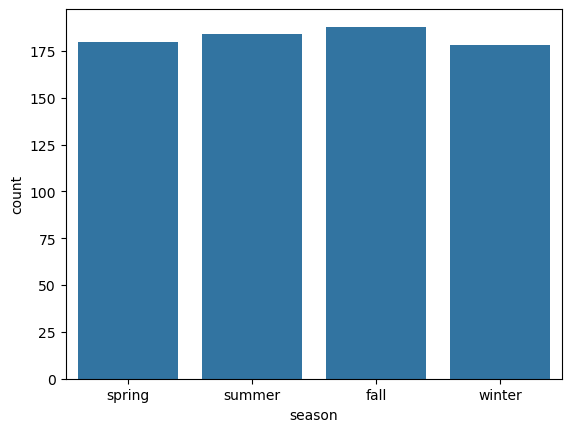

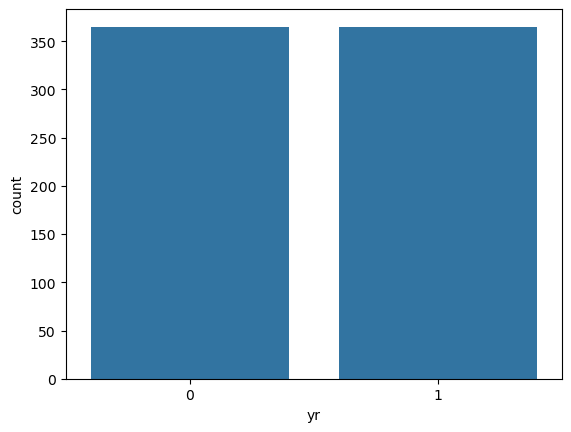

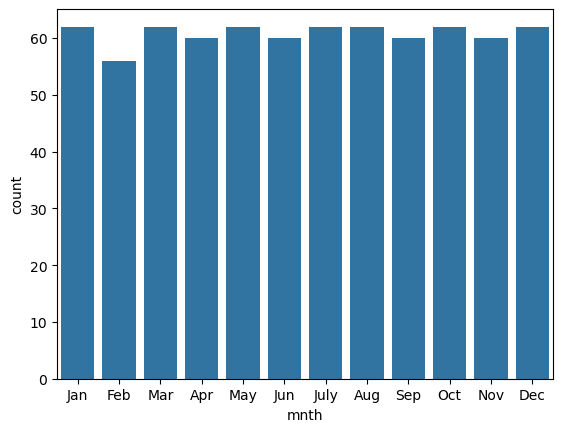

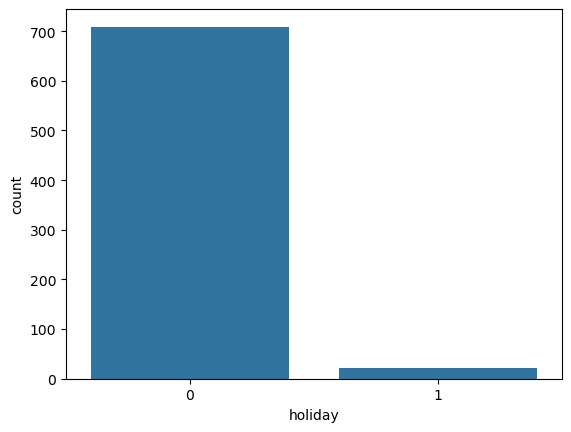

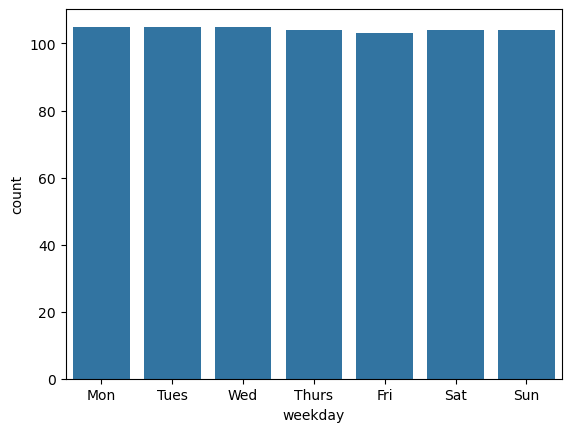

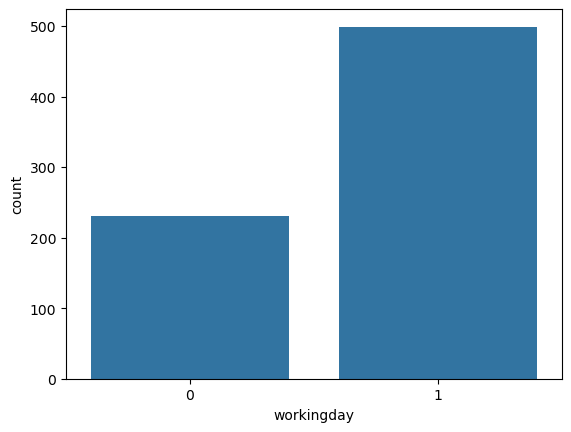

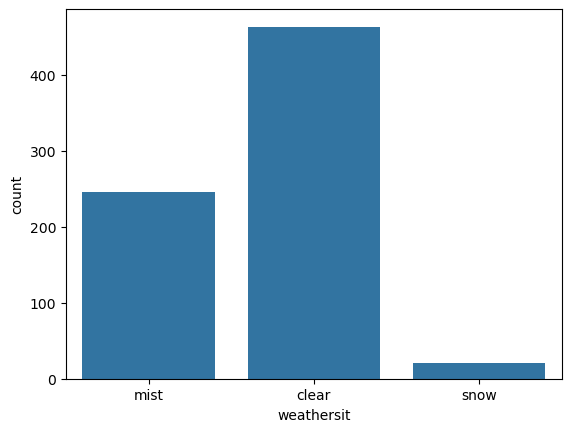

In [16]:
## univariate analysis

## For categorical_columns count_plots
for i in cat_cols:
    sns.countplot(x = i,data=bike_data)
    plt.show()

In [17]:
## As there is no data for heavy rains , checking if any data exists for heavy rain or not

bike_data["weathersit"].value_counts()

weathersit
clear    463
mist     246
snow      21
Name: count, dtype: int64

## Observations from univariate analysis:
    - 

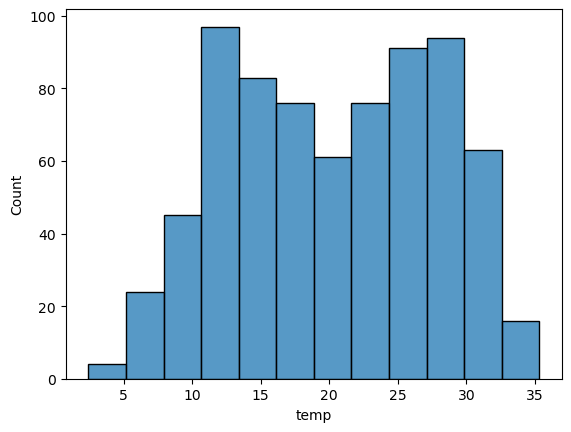

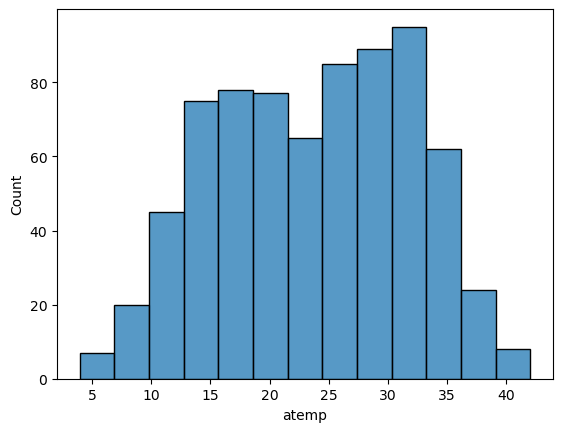

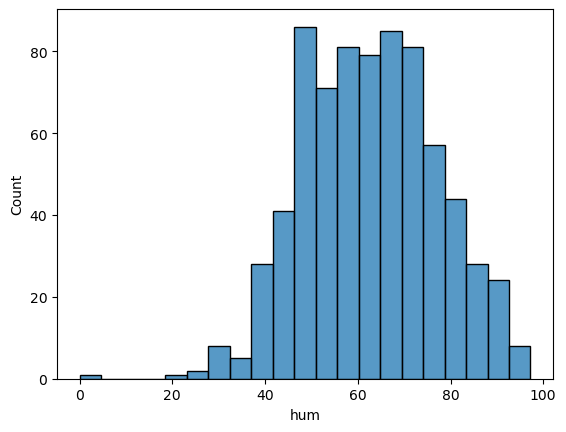

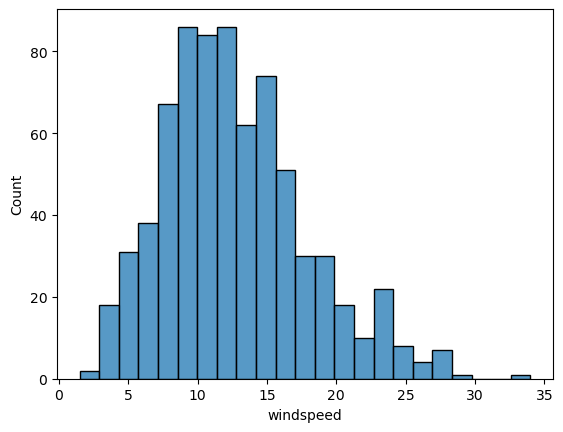

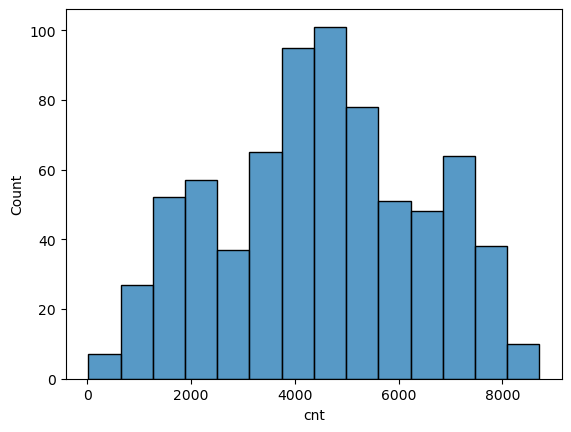

In [18]:
for i in num_cols:
    sns.histplot(x=i,data=bike_data)
    plt.show()
    

## Bivariate analysis

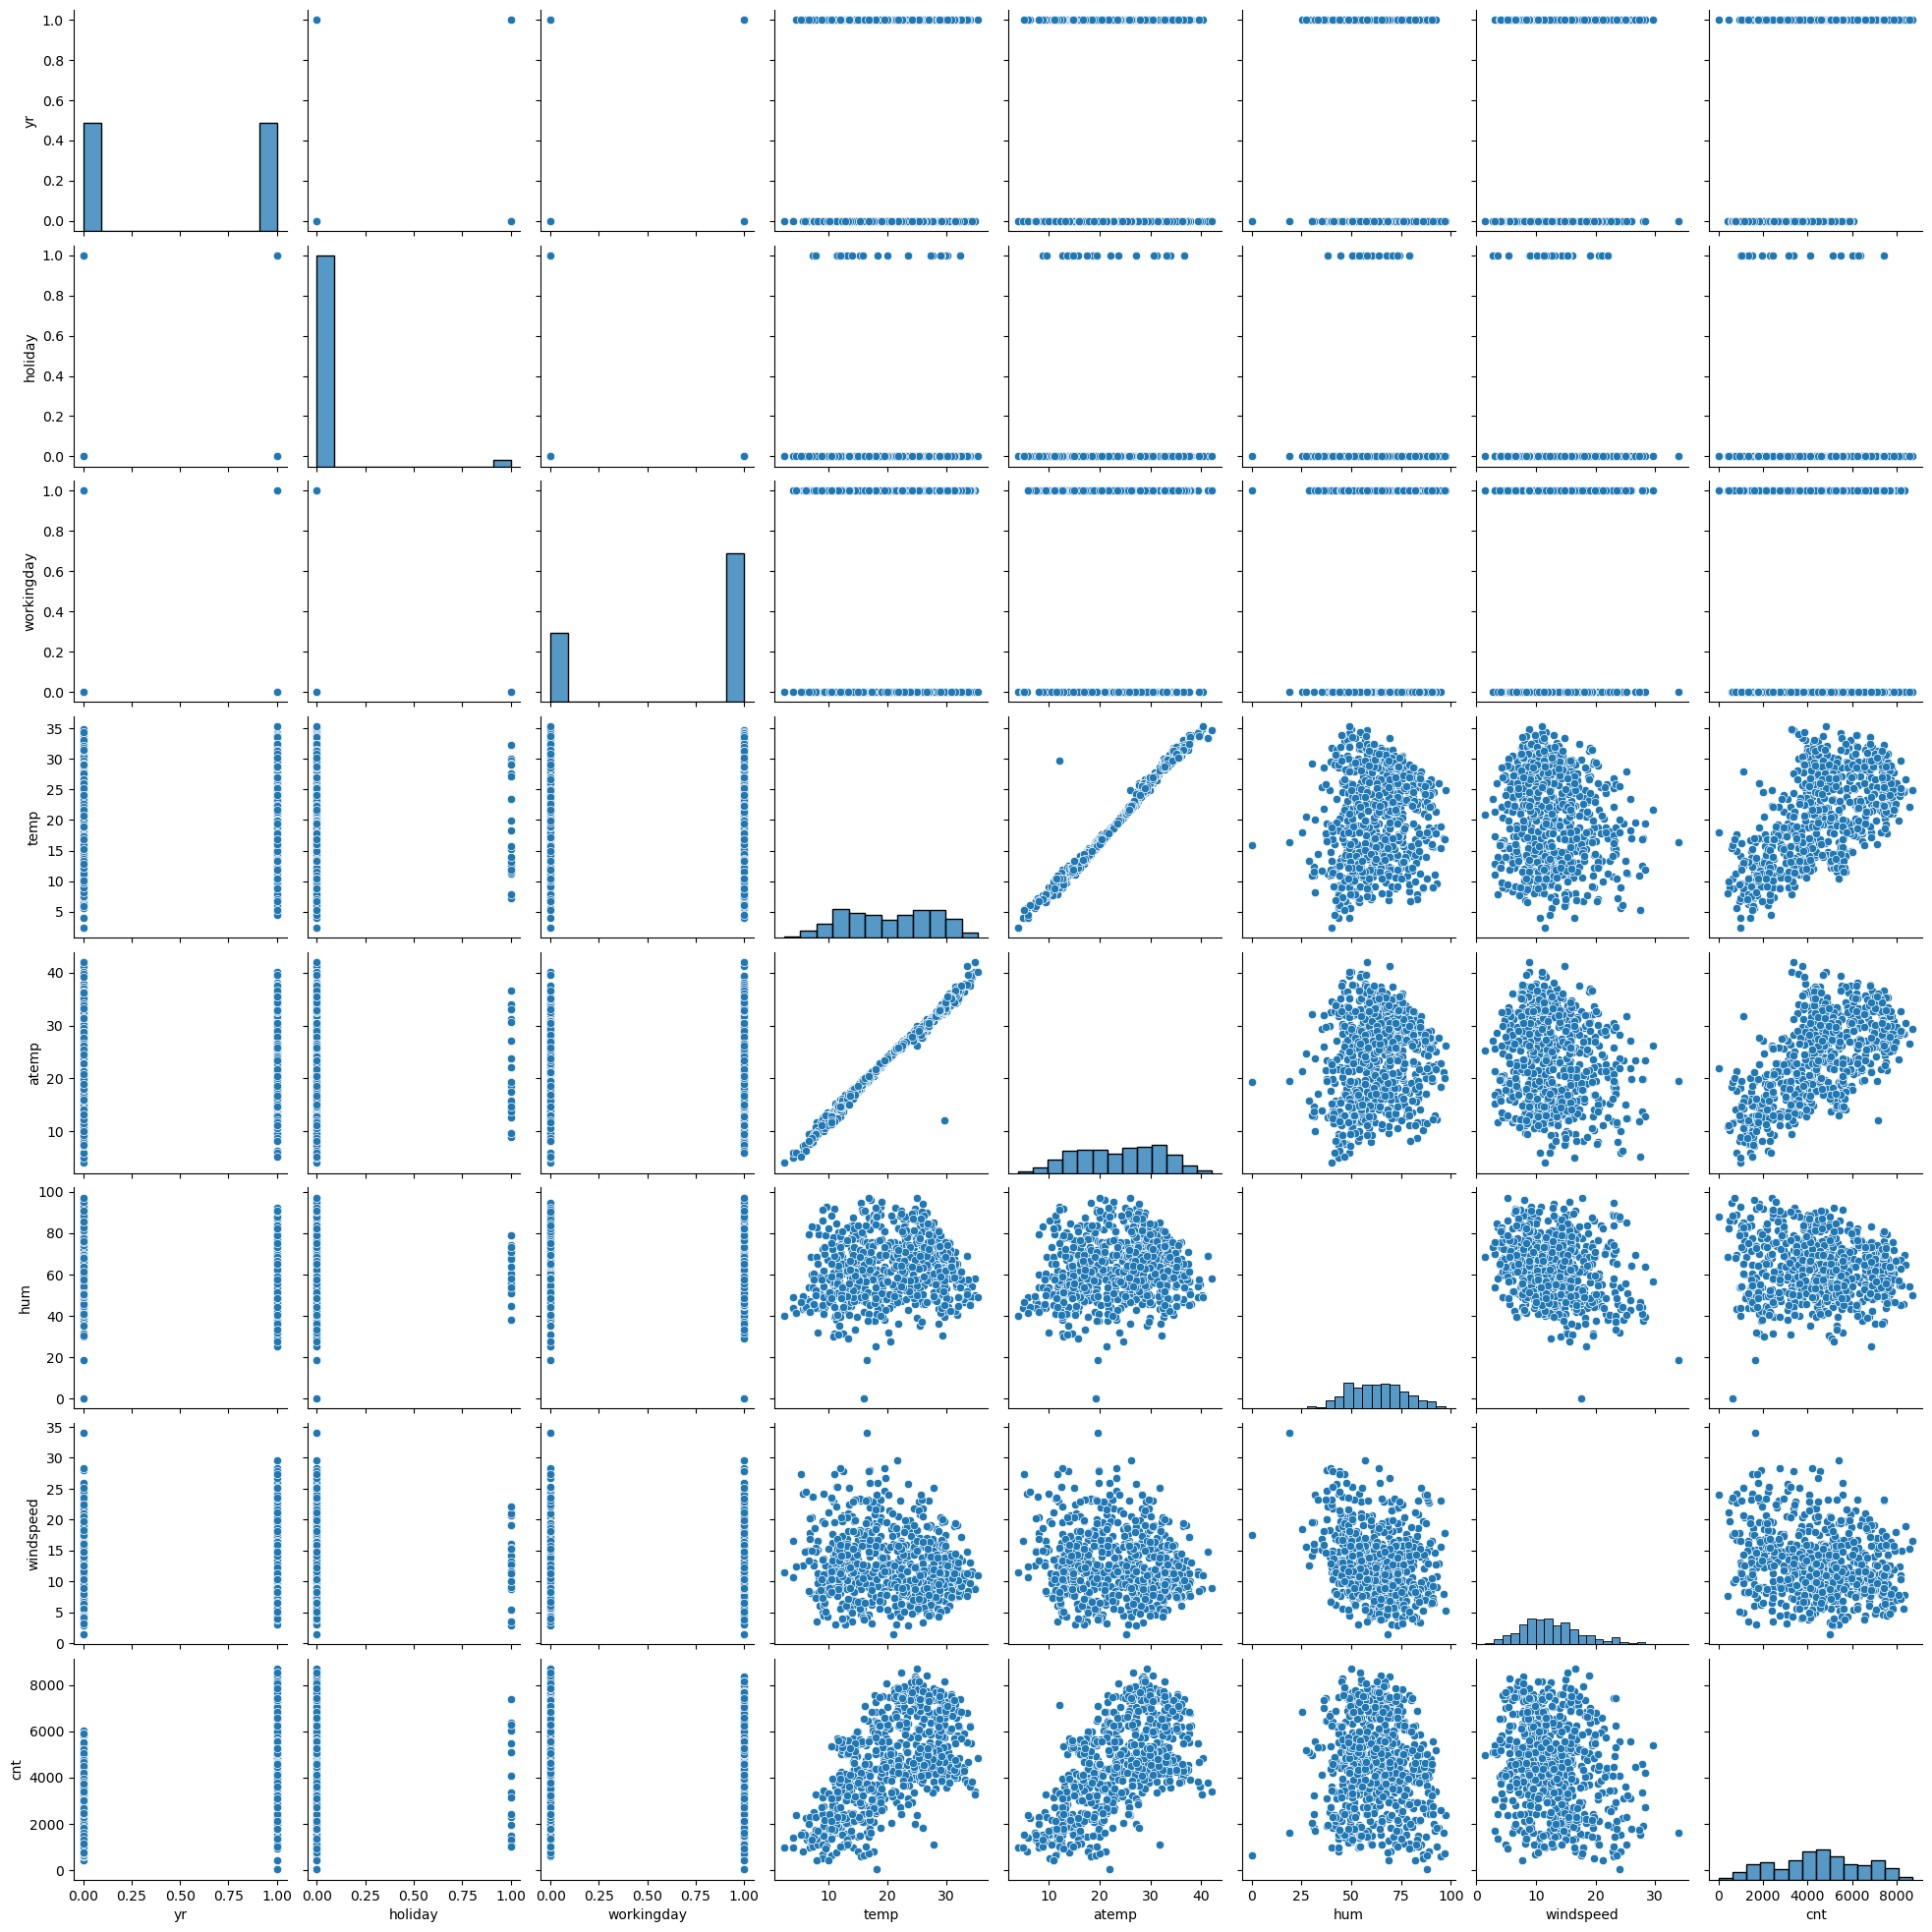

In [19]:
## pairwise plot
sns.pairplot(data=bike_data)
plt.show()

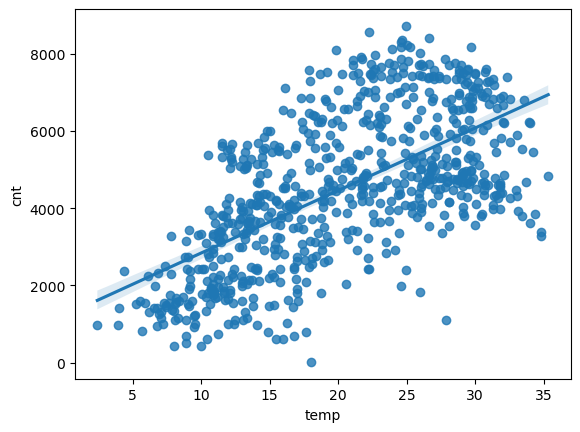

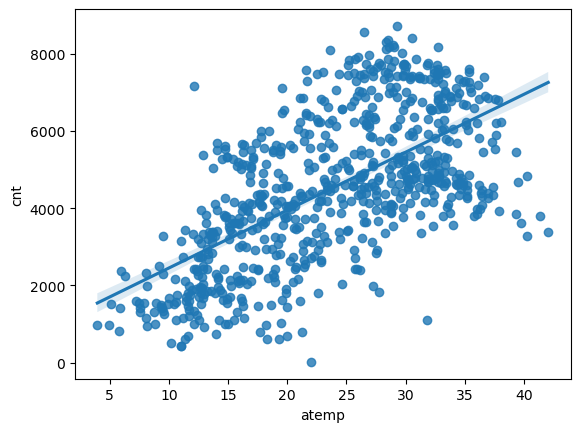

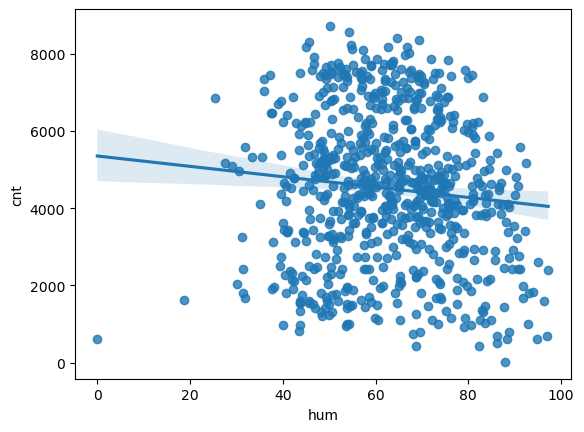

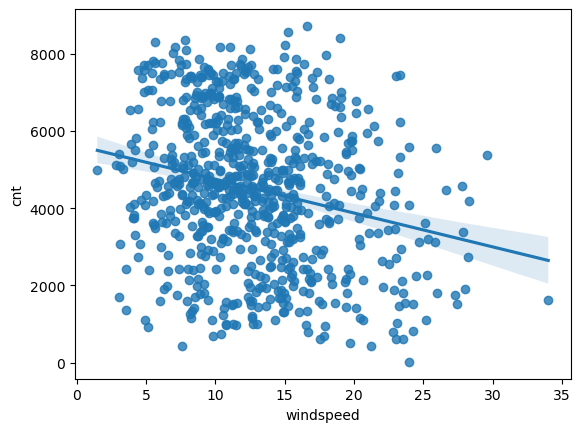

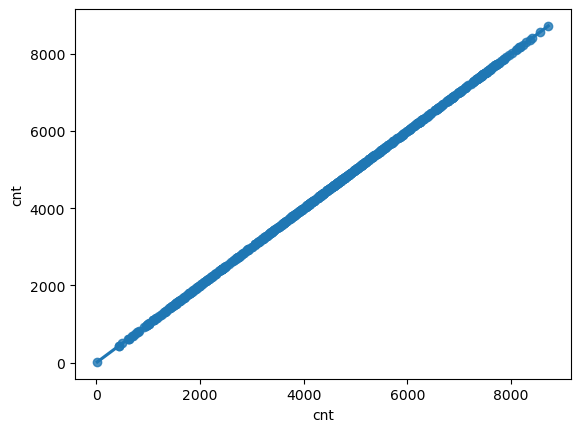

In [20]:
for i in num_cols:
    sns.regplot(data=bike_data,x=i,y="cnt")
    plt.show()

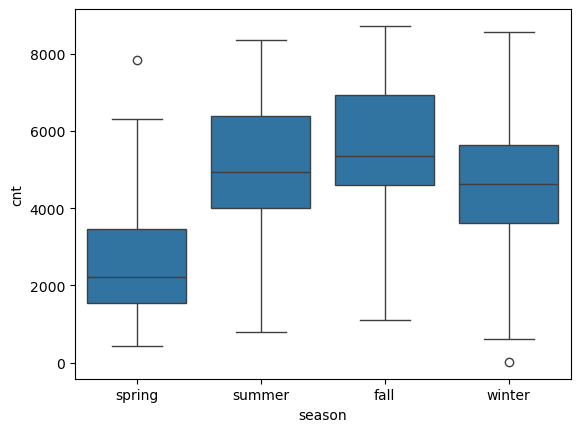

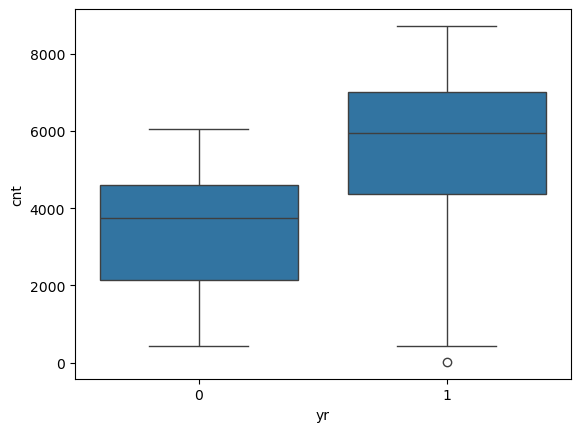

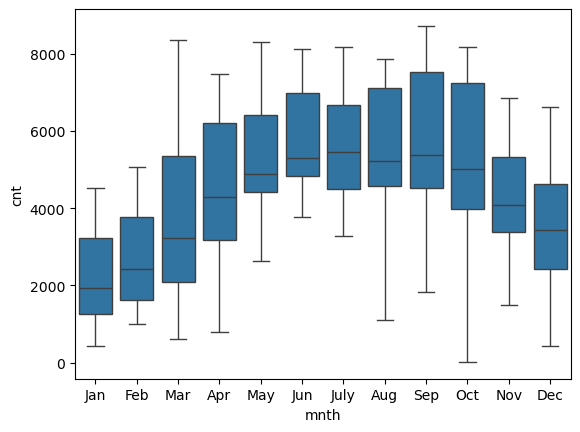

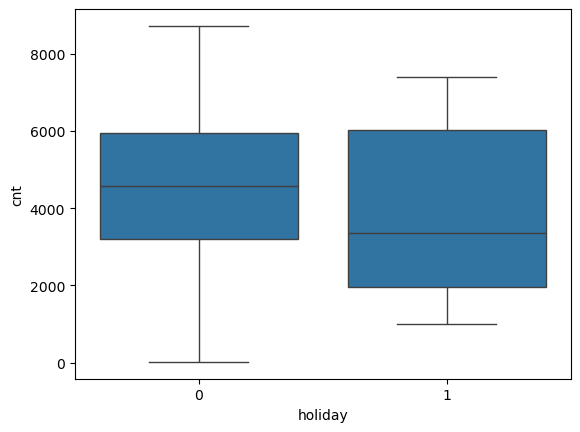

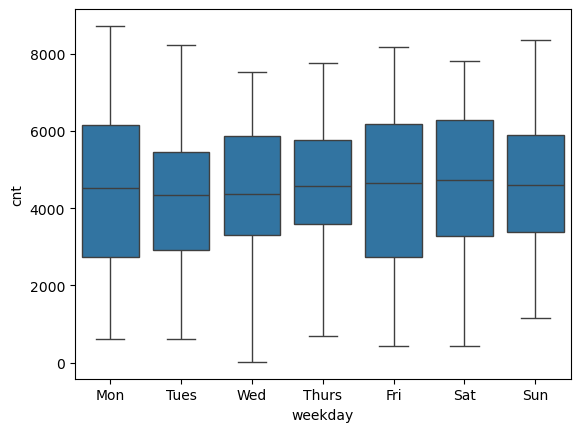

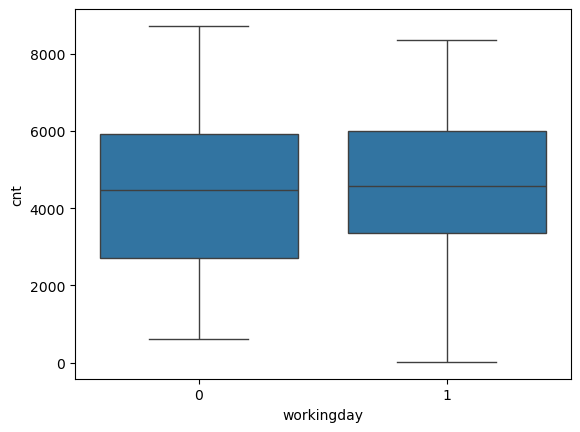

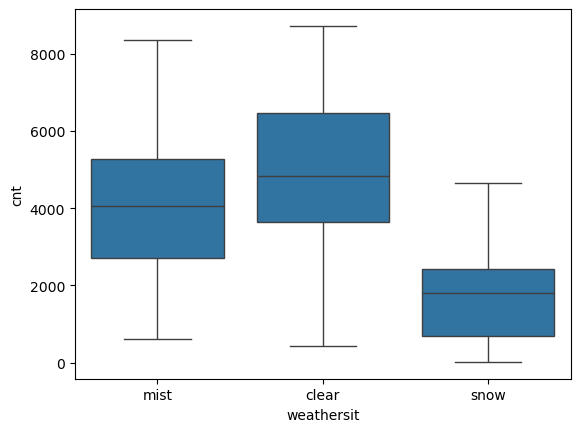

In [21]:
## For categorical_columns  versus numericalcount_plots
for i in cat_cols:
    sns.boxplot(x = i,y="cnt",data=bike_data)
    plt.show()

## Step:3 Data preparation
    - creating dummies variables

In [22]:
## get list of variables for which dummy variables needs to be created b
cols_for_dummies = [];
for i in cat_cols:
    print("No. of categories in " , i,bike_data[i].nunique())
    if bike_data[i].nunique() >2 :
        cols_for_dummies.append(i) 
print(cols_for_dummies)

No. of categories in  season 4
No. of categories in  yr 2
No. of categories in  mnth 12
No. of categories in  holiday 2
No. of categories in  weekday 7
No. of categories in  workingday 2
No. of categories in  weathersit 3
['season', 'mnth', 'weekday', 'weathersit']


In [23]:
## create dummies
dummies_df = pd.get_dummies(bike_data[cols_for_dummies],drop_first=True,dtype=int)
dummies_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
## merge dummies colums to original data_frame 
bike_data = pd.concat([bike_data,dummies_df.astype(int)],axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
0,spring,0,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
## drop the columns from which dummies are created 
bike_data = bike_data.drop(cols_for_dummies,axis=1)
print(bike_data.shape)

(730, 30)


In [26]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the data into Training and test sets

In [27]:
from sklearn.model_selection import train_test_split
bike_train_df, bike_test_df = train_test_split(bike_data, train_size = 0.7, random_state = 100)

In [28]:
## testing train and split data shape
print(bike_train_df.shape)
print(bike_test_df.shape)

(510, 30)
(220, 30)


## Step 5 : Rescaling of features using min max scaler
    - needed as features are not on same scale and will be difficult to interpret the model

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
## scaling all numeric features except dummy variables
bike_train_df[num_cols] = scaler.fit_transform(bike_train_df[num_cols])
bike_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [31]:
bike_train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
## rescaling test data 
bike_test_df[num_cols] = scaler.transform(bike_test_df[num_cols])
bike_test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [33]:
bike_test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_mist,weathersit_snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking coffecients to see if there are variables which are highly correlated

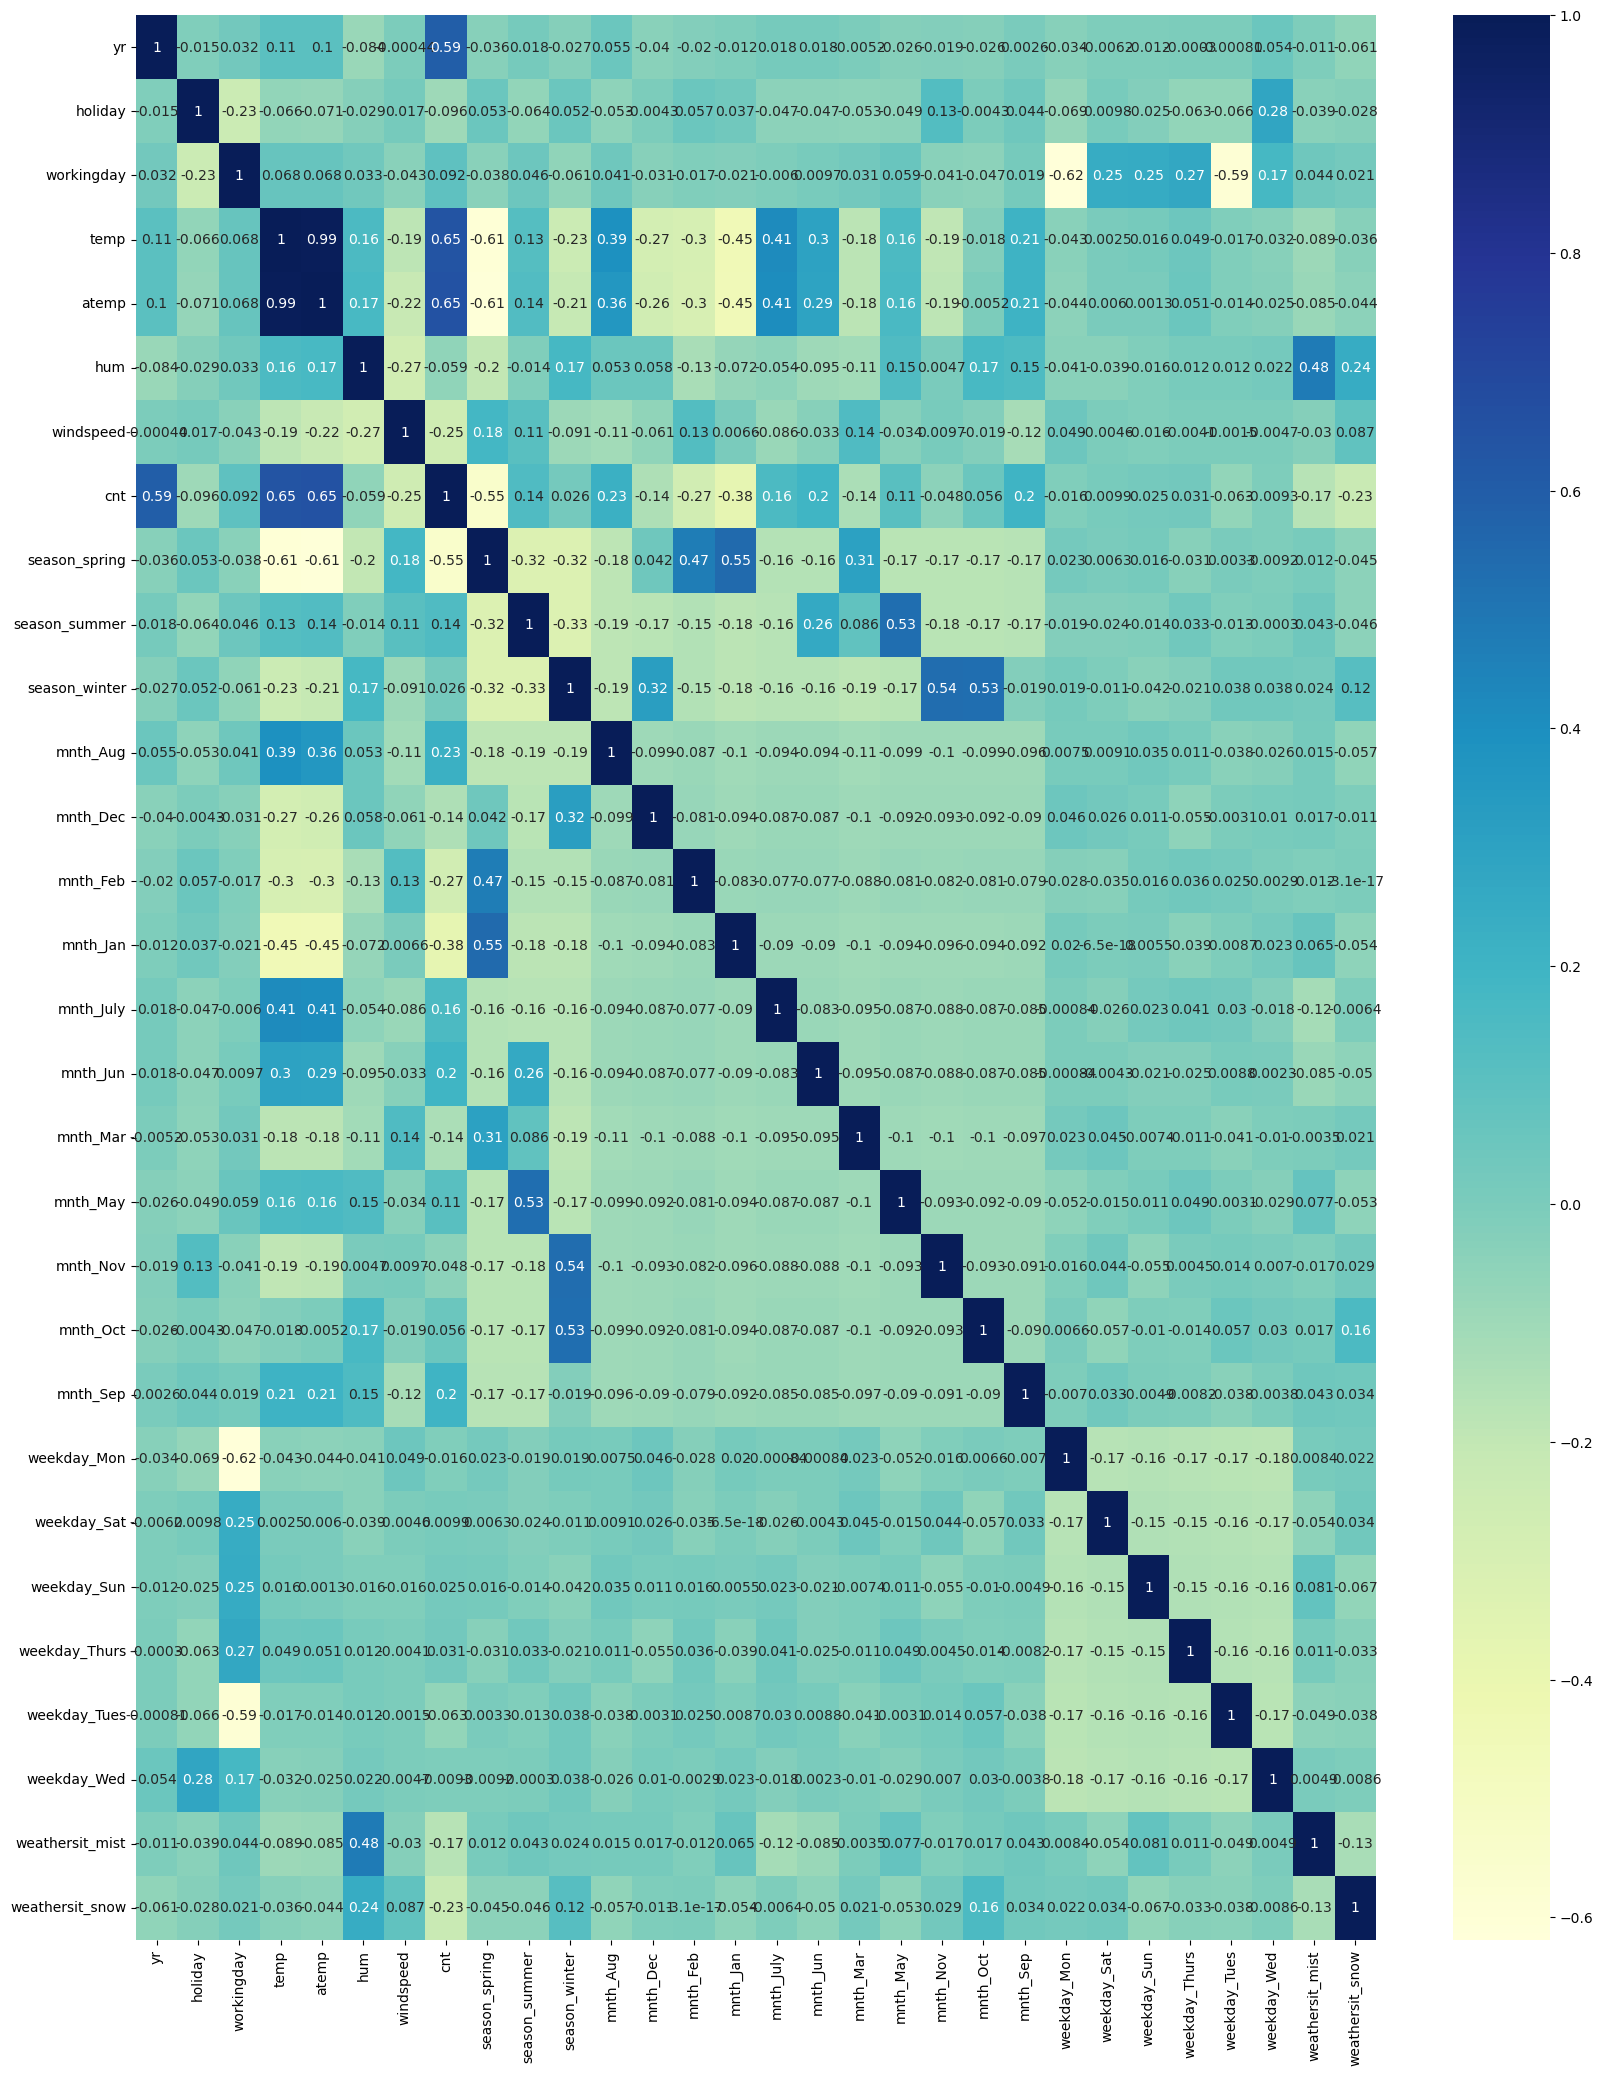

In [34]:
plt.figure(figsize = (20, 25))
sns.heatmap(bike_train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Observation
    - as we can see that there is high correlation between atemp and temp.

## Step 6: Building a linear model
    - as there are 30 features, we will first use RFE to select top 15 features and then  manually select the features based on VIP and p value

In [35]:
y_train = bike_train_df.pop('cnt')
X_train = bike_train_df

In [36]:
bike_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   season_spring    510 non-null    int32  
 8   season_summer    510 non-null    int32  
 9   season_winter    510 non-null    int32  
 10  mnth_Aug         510 non-null    int32  
 11  mnth_Dec         510 non-null    int32  
 12  mnth_Feb         510 non-null    int32  
 13  mnth_Jan         510 non-null    int32  
 14  mnth_July        510 non-null    int32  
 15  mnth_Jun         510 non-null    int32  
 16  mnth_Mar         510 non-null    int32  
 17  mnth_May         51

In [37]:
y_train.shape

(510,)

#### Building model with RFE

In [38]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 9),
 ('weekday_Thurs', False, 14),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', False, 13),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [40]:
## Columns which are selected by RFE. 
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sep', 'weekday_Mon', 'weekday_Tues', 'weathersit_mist',
       'weathersit_snow'],
      dtype='object')


In [41]:
col.dtype

dtype('O')

In [42]:
# features which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Wed'],
      dtype='object')

In [43]:
X_train_rfe = X_train[col]

In [44]:
# Function to calculate VIF of features

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [45]:
#function to build a model using statsmodel
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [46]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,weekday_Mon,12.20
12,weekday_Tues,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
13,weathersit_mist,1.57


#### Manualy selecting features for LR Module

In [47]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        17:22:58   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

In [48]:
# As holiday shows high p values hence we can drop it
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_Mon,4.91
5,season_spring,4.80
11,weekday_Tues,4.76
7,season_winter,3.69
6,season_summer,3.04
12,weathersit_mist,2.31


In [49]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        17:22:58   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

In [50]:
# We can drop weekday_tues variable as it has high p-value
X_train_new = X_train_new.drop(['weekday_Tues'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
5,season_spring,4.18
7,season_winter,3.39
6,season_summer,2.84
11,weathersit_mist,2.28
0,yr,2.08
10,weekday_Mon,1.84


In [51]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.54e-191
Time:                        17:22:58   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2307      0.036     

In [52]:
# We can drop weekday_tues variable as it has high p-value
X_train_new = X_train_new.drop(['season_spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,16.21
2,temp,10.36
1,workingday,4.54
4,windspeed,3.73
10,weathersit_mist,2.10
0,yr,2.03
9,weekday_Mon,1.79
5,season_summer,1.76
6,season_winter,1.70
7,mnth_July,1.55


In [53]:
# Building 4rd linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          4.14e-191
Time:                        17:22:58   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1712      0.028     

In [54]:
# We can drop weekday_tues variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_July'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
9,weathersit_mist,2.10
0,yr,2.02
8,weekday_Mon,1.79
6,season_winter,1.66
5,season_summer,1.58
7,mnth_Sep,1.20


In [55]:
# Building 5rd linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.10e-191
Time:                        17:22:58   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1705      0.029     

In [56]:
# We can drop humidity variable as it has high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_Mon,1.69
4,season_summer,1.57
8,weathersit_mist,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
9,weathersit_snow,1.08


In [57]:
# Building 6rd linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.13e-188
Time:                        17:22:58   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

In [58]:
# Checking the parameters and their coefficient values
lr_6.params

const              0.075009
yr                 0.233139
workingday         0.056117
temp               0.549892
windspeed         -0.155203
season_summer      0.088621
season_winter      0.130655
mnth_Sep           0.097365
weekday_Mon        0.067500
weathersit_mist   -0.080022
weathersit_snow   -0.287090
dtype: float64

In [59]:
### Step 7 : Residual analysis 
X_train_lm_6.head()

,const,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_Sep,weekday_Mon,weathersit_mist,weathersit_snow
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,1,0
111,1.0,0,1,0.345824,0.380981,1,0,0,0,1,0


In [60]:
X_train_lm_6.shape

(510, 11)

In [61]:
y_train_pred = lr_6.predict(X_train_lm_6)

In [62]:
### checking normality of error terms

Text(0.5, 0, 'Errors')

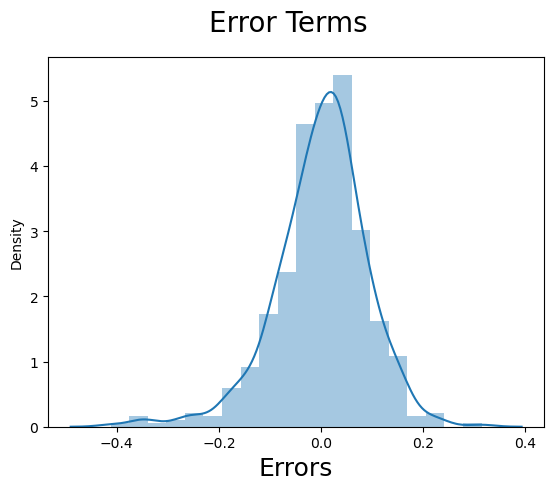

In [63]:
# Plot the histogram of the error terms
residual = y_train - y_train_pred

fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Observations
    -error terms are normally distributed

### Checking Multi-colinearity

In [64]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_Mon,1.69
4,season_summer,1.57
8,weathersit_mist,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
9,weathersit_snow,1.08


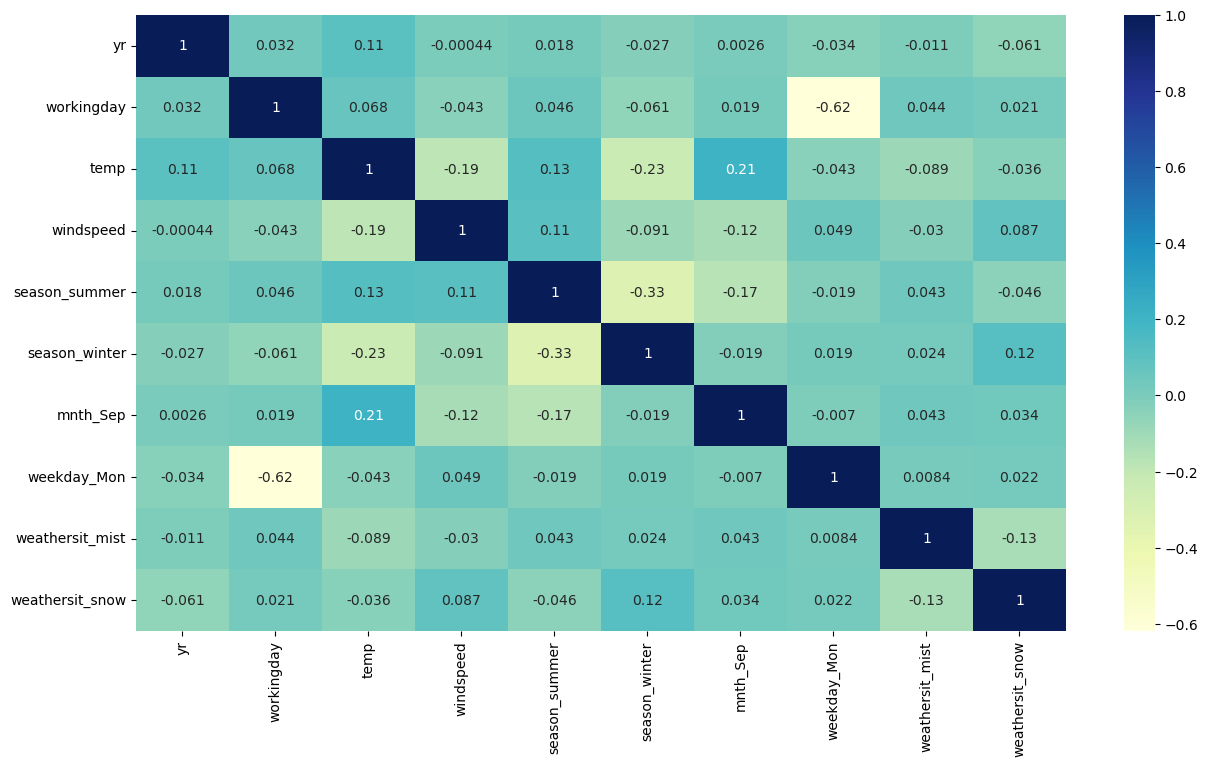

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

VIF values are less than 5 for all the features and also there is no multicolinearity as seen from the heatmap.

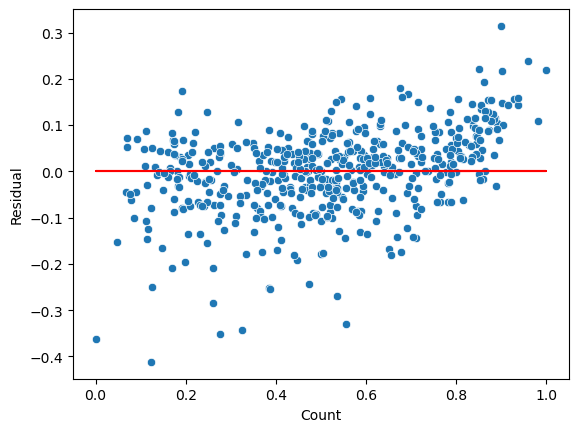

In [66]:

sns.scatterplot(x = y_train,y= residual)
plt.plot(y_train,(y_train-y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible patterns is observed from residual plot

### Step 8: Making predication 


In [67]:
y_test = bike_test_df.pop('cnt')
X_test = bike_test_df

In [68]:
selected_features = X_train_new.columns

X_test = X_test[selected_features]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [69]:
y_test_pred = lr_6.predict(X_test_lm_6)

In [70]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7961

### Step 9: Model Evaluation

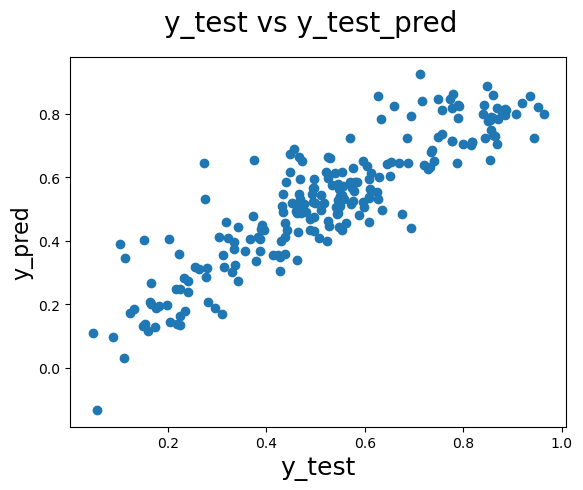

In [71]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [72]:
## weights of the features 
round(lr_6.params,4)

const              0.0750
yr                 0.2331
workingday         0.0561
temp               0.5499
windspeed         -0.1552
season_summer      0.0886
season_winter      0.1307
mnth_Sep           0.0974
weekday_Mon        0.0675
weathersit_mist   -0.0800
weathersit_snow   -0.2871
dtype: float64

#### Equation of our best fitted line is:

##### cnt =  0.0750 +  0.2331 x yr +  0.0561 x workingday + 0.5499 x temp - 0.1552 x windspeed +  0.0886 x season_summer  +  0.1307 x season_winter  +  0.0974 x mnth_Sep  +  0.0675 x weekday_Mon -0.0800 x weathersit_mist -0.2871 x weathersit_snow  


In [73]:
# Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


#### Comparision between Training/Testing dataset:
- Train dataset R^2          : 0.835
- Test dataset R^2           : 0.832
- Train dataset Adjusted R^2 : 0.7961   
- Test dataset Adjusted R^2  : 0.7864

##### So as per the model demand of bikes depend on year, working day, temp, windspeed, summer season, winter season , september mnth,weekday Mon, weather Misty and snow